In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from helper import *
from planarnetwork import PlanarNetwork

{0: (0, -1, 1), 6: (-1, 2, 0), 1: (0, 2, 0)} [0, 6, 1]
(1, 7) {'dual': (3, 2, 0)}
(1, 5) {'dual': (3, 5, 0)}
(1, 4) {'dual': (0, 5, 0)}
(1, 6) {'dual': (-1, 2, 2)}
(1, 0) {'dual': (-1, 0, 0)}
(0, 9) {'dual': (-1, 4, 1)}
(0, 4) {'dual': (0, 4, 0)}
(2, 5) {'dual': (-1, 5, 0)}
(2, 9) {'dual': (1, -1, 0)}
(2, 4) {'dual': (1, 5, 0)}
(4, 9) {'dual': (4, 1, 0)}
(5, 8) {'dual': (-1, 3, 1)}
(6, 7) {'dual': (-1, 2, 1)}
(7, 8) {'dual': (-1, 3, 0)}
1 {'ngb': [4, 0, 6, 7, 5]}
0 {'ngb': [1, 4, 9]}
2 {'ngb': [9, 4, 5]}
4 {'ngb': [1, 2, 9, 0]}
5 {'ngb': [2, 1, 8]}
6 {'ngb': [7, 1]}
7 {'ngb': [1, 6, 8]}
8 {'ngb': [5, 7]}
9 {'ngb': [2, 0, 4]}
(-1, 3, 0) {'dual': (8, 7)}
(-1, 3, 1) {'dual': (8, 5)}
(-1, 4, 1) {'dual': (9, 0)}
(-1, 1, 0) {'dual': (2, 9)}
(-1, 5, 0) {'dual': (5, 2)}
(-1, 2, 1) {'dual': (6, 7)}
(-1, 2, 2) {'dual': (6, 1)}
(-1, 0, 0) {'dual': (1, 0)}
(0, 5, 0) {'dual': (1, 4)}
(0, 4, 0) {'dual': (4, 0)}
(1, 4, 0) {'dual': (9, 4)}
(1, 5, 0) {'dual': (2, 4)}
(2, 3, 0) {'dual': (7, 1)}
(3, 5, 0

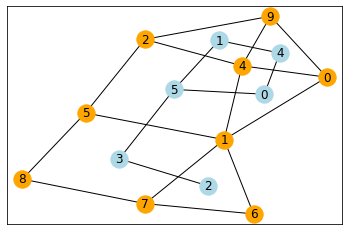

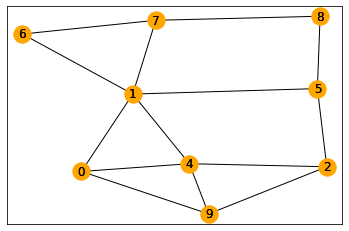

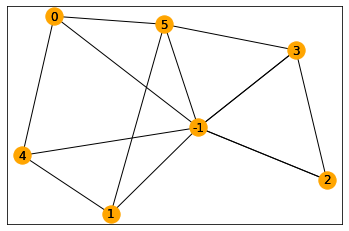

In [3]:
class GrowingPlanarNetwork(PlanarNetwork):
    """
    Growing and shrinking rules are as follow :
    - ...
    """
        
    def index_from_coord(self, i, j, size):
        if i < 0 or j < 0 or j >= size or i >= size:
            return None
        return i * size + j
        
    # checked for size=3
    # factorisable mais osef
    def init_square(self, size=3):
        void = -1
        G = nx.Graph()
        D = nx.MultiGraph()
        D.add_node(-1)
        D.nodes[-1]["ngb"] = CircularList()  # could be a void list
        for i in range(size):
            for j in range(size):
                pass
                    
        for i in range(size):
            for j in range(size):
                this = self.index_from_coord(i, j, size)
                less = self.index_from_coord(i - 1, j - 1, size)
                dualless = self.index_from_coord(i - 1, j - 1, size - 1)
                if i < size - 1 and j < size - 1:
                    dualthis = self.index_from_coord(i, j, size - 1)
                    D.add_node(dualthis)
                    D.nodes[dualthis]["ngb"] = CircularList()
                    
                if j > 0:
                    # horizontal planar
                    target = self.index_from_coord(i, j - 1, size)
                    dualtarget = self.index_from_coord(i, j - 1, size - 1)
                    G_edge = (this, target)
                    # horizontal dual
                    if i == 0:
                        D_edge = (void, dualtarget)
                    elif i == (size - 1):
                        D_edge = (void, dualless)
                    else:
                        D_edge = (dualtarget, dualless)
                    idx = D.add_edge(*D_edge, dual=G_edge)
                    G.add_edge(*G_edge, dual=(*D_edge, idx))
                    if D_edge[0] is not None:
                        D.nodes[D_edge[0]]["ngb"].append(Ltuple((*D_edge, idx)))
                    if D_edge[1] is not None:
                        D.nodes[D_edge[1]]["ngb"].append(Ltuple((*D_edge, idx)))
                        
                if i > 0:
                    # vertical planar
                    target = self.index_from_coord(i - 1, j, size)
                    dualtarget = self.index_from_coord(i - 1, j, size - 1)
                    G_edge = (this, target)
                    # vertical dual
                    if j == 0:
                        D_edge = (void, dualtarget)
                    elif j == (size - 1):
                        D_edge = (void, dualless)
                    else:
                        D_edge = (dualtarget, dualless)
                    
                    idx = D.add_edge(*D_edge, dual=G_edge)
                    G.add_edge(*G_edge, dual=(*D_edge, idx))
                    if D_edge[0] is not None:
                        D.nodes[D_edge[0]]["ngb"].append(Ltuple((*D_edge, idx)))
                    if D_edge[1] is not None:
                        D.nodes[D_edge[1]]["ngb"].append(Ltuple((*D_edge, idx)))
                    

        # set cyclic values for all nodes
        ngbs = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        for i in range(size):
            for j in range(size):
                this = self.index_from_coord(i, j, size)
                # planar
                G.nodes[this]["ngb"] = CircularList()
                for ngb in ngbs:
                    # TODO get edge instead of node
                    new = self.index_from_coord(*add((i, j), ngb), size)
                    if new is not None:
                        G.nodes[this]["ngb"].append(new)
        
        self.G = G
        self.D = D
        
    def get_intermediate_neighbours(self, node, net="planar"):
        """
        net is either 'planar' or 'dual'
        """
        G = self.G if net == "planar" else self.D
        ls_inter = list()
        ngbs = G.nodes[node]["ngb"]
        for ngb in ngbs:
            if net == "planar":
                ls_inter += list(G.edges[(node, ngb)]["dual"][:2])
            else:
                ls_inter += list(G.edges[ngb]["dual"][:2])
            
        return unique(ls_inter)
            
    def dual_cycle_pairs(self, node):
        ngbs = self.G.nodes[node]["ngb"]
        cycle = dict()  # order is kept by ngbs
        ls_pairs = list()
        for ngb in ngbs:
            ls_pairs.append(self.G.edges[(node, ngb)]["dual"])
        ls_pairs = cycle_from_ordered_list_pairs(ls_pairs)
        self.debug(locals())
        return {ngb: pair for ngb, pair in zip(ngbs, ls_pairs)}
    
    def planar_cycle_pairs(self, node):
        ngbs = self.D.nodes[node]["ngb"]
        cycle = dict()  # order is kept by ngbs
        ls_pairs = list()
        for ngb in ngbs:
            ls_pairs.append(self.D.edges[ngb]["dual"])
        ls_pairs = cycle_from_ordered_list_pairs(ls_pairs)
        return {ngb: pair for ngb, pair in zip(ngbs, ls_pairs)}
        
    def duplicate_random_node(self):
        n = random.choice(list(self.G.nodes))
        self.duplicate_node(n)
    
    def duplicate_node(self, node):
        """
        We have a graph, a dual graph, edge indexes and ngb cyclic order
        All must stay ok to prove consistence through recurrence
        
        Division step:
        A1) Split neighbours according to the cyclic order
        A1b) Construct "neighbour" dual node (intermediate graph with order)
        A2) Update edges and dual graph edges accordingly
        A3) Add inner edge with corresponding dual
        
        Compensation step:
        B1) Get previous neighbour dual node
        B2) Select dual node if #ngb > 4
        B3) For all of them, iteratively
        B4) Select pair of non-adjacent nodes with lowest degree
        B5) As for normal step, run a split neighbour + edge update + inner edge
        
        Make graphics to help understand
        """
        
        # A1
        ngbs = self.G.nodes[node]["ngb"]
        nb_ngbs = len(ngbs)
        half_1 = nb_ngbs // 2
        half_2 = nb_ngbs - half_1
        
        # A1b
        cycle_dual = self.dual_cycle_pairs(node)
        
        # A2 remove edge
        for ngb in ngbs:
            self.G.remove_edge(node, ngb)
        
        # division
        new_node = self.index("planar")
        self.G.add_node(new_node)
        split_ngb = random.choice(ngbs)
        current = split_ngb

        self.G.nodes[node]["ngb"] = CircularList()
        self.G.nodes[new_node]["ngb"] = CircularList()
        
        for i in range(half_1):
            self.G.add_edge(node, current, dual=cycle_dual[current])
            self.G.nodes[node]["ngb"].append(current)
            current = ngbs.next(current)
        self.G.nodes[node]["ngb"].append(new_node)
        
        opp_split_ngb = current
        for j in range(half_2):
            self.G.add_edge(new_node, current, dual=cycle_dual[current])
            self.D.edges[cycle_dual[current]]["dual"] = (new_node, current)
            self.G.nodes[new_node]["ngb"].append(current)
            # update ngb
            ls_to_update = self.G.nodes[current]["ngb"]
            ls_to_update[ls_to_update.index(node)] = new_node
            current = ngbs.next(current)
        self.G.nodes[new_node]["ngb"].append(node)
        
            
        # A3
        first_dual_edge = Ltuple(cycle_dual[split_ngb])
        second_dual_edge = Ltuple(cycle_dual[opp_split_ngb])

        if len(cycle_dual) >= 3:
            # implicit
            first_dual, second_dual = first_dual_edge[0], second_dual_edge[0]
            
        elif len(cycle_dual) == 2:
            assert min(first_dual_edge[:2]) == min(second_dual_edge[:2])
            assert max(first_dual_edge[:2]) == max(second_dual_edge[:2])
            # need to use the non -1 dual as an anchor
            first_dual, second_dual = min(first_dual_edge[:2]), max(first_dual_edge[:2])
            ref_order = self.D.nodes[first_dual]["ngb"]
            if ref_order.match_pattern([first_dual_edge, second_dual_edge]):
                pass
            
            elif ref_order.match_pattern([second_dual_edge, first_dual_edge]):
                first_dual_edge, second_dual_edge = second_dual_edge, first_dual_edge
            
            else:
                raise RuntimeError("pattern matching on dual edge did not work")
        
        idx = self.D.add_edge(first_dual, second_dual, dual=(node, new_node))
        inner_dual_edge = Ltuple((first_dual, second_dual, idx))
        self.G.add_edge(node, new_node, dual=inner_dual_edge)
        
        # keep order for dual inner
        # to do so, cycle_dual has information on the dual edges
        # so we must insert it after this one
        idx_1 = index_of(first_dual_edge, self.D.nodes[first_dual]["ngb"])
        self.D.nodes[first_dual]["ngb"].insert(idx_1 + 1, inner_dual_edge)
        idx_2 = index_of(second_dual_edge, self.D.nodes[second_dual]["ngb"])
        self.D.nodes[second_dual]["ngb"].insert(idx_2 + 1, inner_dual_edge)
        
        # B
        dual_list = list_from_cycle_dual(cycle_dual)
        
        for dual_node in dual_list:
            if self.D.degree(dual_node) > 4 and dual_node != -1:
                self.shorten_cycle(dual_node)
        
    def shorten_cycle(self, dual_node, source=None, target=None):  # aka Compensation Step
        """
        This function adds an edge between two opposite nodes in a cycle
        if the cycle is longer than 5, because it is not biologically plausible
        
        Compensation step:
        B1) Get previous neighbour dual node
        B2) Select dual node if #ngb > 4
        B3) For all of them, iteratively
        B4) Select pair of non-adjacent nodes with lowest degree
        B5) As for normal step, run a split neighbour + edge update + inner edge
        """
        rand_planar_ngb = self.get_intermediate_neighbours(dual_node, net="dual")
        random.shuffle(rand_planar_ngb)
        min_pair = None
        min_score = 1e6
        # B4
        for i in rand_planar_ngb:
            for j in rand_planar_ngb:
                if j <= i or (i, j) in self.G.edges:
                    continue
                score = self.G.degree(i) + self.G.degree(j)
                if score < min_score:
                    min_pair = (i, j)
                    min_score = score
                    
        return self._make_edge(dual_node, min_pair)
                    
    def _make_edge(self, dual_node, min_pair):
        # B5
        if self.verbose:
            print("Shorten", min_pair, "on", dual_node)
        
        # A1
        ngb_edges = self.D.nodes[dual_node]["ngb"]
        nb_ngbs = len(ngb_edges)
        
        
        # A1b
        map_edge_pair = self.planar_cycle_pairs(dual_node)
        
        ordered_cycle_pairs = cycle_from_ordered_list_pairs([map_edge_pair[x] for x in ngb_edges])
        
        ingbs = CircularList([x[0] for x in ordered_cycle_pairs])
        
        map_ingb_pair = {x[0]: x for x in ordered_cycle_pairs}
        
        # A2 remove edge
        for edge in ngb_edges:
            self.D.remove_edge(*edge)
        
        # division
        new_node = self.index("dual")
        self.D.add_node(new_node)
        
        split_ngb_1, split_ngb_2 = min_pair
        current = split_ngb_1

        self.D.nodes[dual_node]["ngb"] = CircularList()
        self.D.nodes[new_node]["ngb"] = CircularList()
        
        while current != split_ngb_2:
            planar_edge = map_ingb_pair[current]
            dual_edge = self.dual(planar_edge)
            
            self.D.add_edge(*dual_edge, dual=planar_edge)
            self.D.nodes[dual_node]["ngb"].append(dual_edge)
            
            current = ingbs.next(current)
        
        
        while current != split_ngb_1:
            planar_edge = map_ingb_pair[current]
            dual_edge = self.dual(planar_edge)
            
            current_edge = self.replace_node(dual_edge, dual_node, new_node)[:2]
            
            idx = self.D.add_edge(*current_edge, dual=planar_edge)
            new_edge = (*current_edge, idx)
            
            self.G.edges[planar_edge]["dual"] = new_edge
            self.D.nodes[new_node]["ngb"].append(new_edge)
            
            dual_current = self.get_other_node(dual_edge, dual_node)
            ls_to_update = self.D.nodes[dual_current]["ngb"]
            
            ls_to_update[index_of(dual_edge, ls_to_update)] = new_edge
            
            current = ingbs.next(current)
        
        
        idx = self.D.add_edge(dual_node, new_node)
        inner_dual_edge = Ltuple((dual_node, new_node, idx))
        self.D.nodes[dual_node]["ngb"].append(inner_dual_edge)
        self.D.nodes[new_node]["ngb"].append(inner_dual_edge)
        
        self.G.add_edge(split_ngb_1, split_ngb_2, dual=inner_dual_edge)
        self.D.edges[inner_dual_edge]["dual"] = (split_ngb_1, split_ngb_2)
        
        
        idx_1 = index_of(map_ingb_pair[split_ngb_1][1], self.G.nodes[split_ngb_1]["ngb"])
        self.G.nodes[split_ngb_1]["ngb"].insert(idx_1 + 1, split_ngb_2)
        idx_2 = index_of(map_ingb_pair[split_ngb_2][1], self.G.nodes[split_ngb_2]["ngb"])
        self.G.nodes[split_ngb_2]["ngb"].insert(idx_2 + 1, split_ngb_1)
        
        return new_node

        
    def replace_node(self, edge, old, new):
        """
        This function is used to modify an edge in the "ngb" slot
        
        Example:
        We have (1, 4, 0) and we need to change the 4 by a 5
        However this function is not correct for dual edge
        """
        edge_ = list(edge)
        edge_[edge_.index(old)] = new
        return tuple(edge_)
    
    def swap_node(self, node1, node2):
        """
        We could only do a reference swap, however this makes harder the monitoring.
        Therefore we implement it
        """
        # sanity check
        assert (node1, node2) in self.G.edges
        
        ngb1, ngb2 = self.ngb(node1), self.ngb(node2)
        ngb1[ngb1.index(node2)] = node1
        ngb2[ngb2.index(node1)] = node2
        self.set_ngb(node2, ngb1)
        self.set_ngb(node1, ngb2)
        
        def ngb_update(self, nodeA, nodeB, ngbs):
            for ngb in ngbs:
                if ngb == nodeA:
                    continue
                dual_edge = self.dual((nodeA, ngb))
                self.set_dual(dual_edge, (nodeB, ngb))
                self.G.add_edge(nodeB, ngb, dual=dual_edge)
                self.G.remove_edge(nodeA, ngb)
                self.ngb(ngb).replace(nodeA, nodeB)
                
        ngb_update(self, node1, node2, ngb1)
        ngb_update(self, node2, node1, ngb2)
    
    def ngb(self, node, net="planar"):
        G = self.G if net == "planar" else self.D
        return G.nodes[node]["ngb"]
    
    def set_ngb(self, node, ngb, net="planar"):
        G = self.G if net == "planar" else self.D
        G.nodes[node]["ngb"] = CircularList(ngb)
        
    # helpers (to use at the end to simplify the code)
    def dual(self, edge):
        if len(edge) == 2:
            return self.G.edges[edge]["dual"]
        
        elif len(edge) == 3:
            return self.D.edges[edge]["dual"]
        
        else:
            raise ValueError(f"edge not recognised : {edge}")
            
    def set_dual(self, edge, dual):
        if len(edge) == 2 and len(dual) == 3:
            self.G.edges[edge]["dual"] = Ltuple(dual)
        
        elif len(edge) == 3 and len(dual) == 2:
            self.D.edges[edge]["dual"] = Ltuple(dual)
        
        else:
            raise ValueError(f"edges not recognised or did not match : {edge}, {dual}")
            
    def get_other_node(self, edge, node):
        if edge[0] == node:
            return edge[1]
        
        elif edge[1] == node:
            return edge[0]
        
        else:
            raise ValueError(f"{node} is not in {edge}")
            
    def check_dual_ngb_consistency(self, node):
        if node not in self.D.nodes:
            return
        ngb_edges = self.D.nodes[node]["ngb"]
        nb_ngbs = len(ngb_edges)
        map_edge_pair = self.planar_cycle_pairs(node)
        ordered_cycle_pairs = cycle_from_ordered_list_pairs([map_edge_pair[x] for x in ngb_edges])
        
        for i in range(1, len(ordered_cycle_pairs)):
            assert ordered_cycle_pairs[i][0] == ordered_cycle_pairs[i - 1][1]
            
    def create_edge(self, source, target):
        """
        Only for planar graph, not for dual
        """
        graph_source = self.get_intermediate_neighbours(source, net="planar")
        graph_target = self.get_intermediate_neighbours(target, net="planar")
        inter = list(set(graph_source) & set(graph_target) - set((-1,)))
        
        if len(inter) > 1:
            raise ValueError(f"Cannot add edge for {source} and {target} "
                             f"because their neighbour are {graph_source} and "
                             f"{graph_target}")
            
        elif len(inter) == 0:
            # TBD but not that complicated
            pass
        else:
            dual_node = inter[0]
        
            self._make_edge(dual_node, (source, target))
        
    def remove_node(self, node):
        """
        In a remove node, we first connect all neighbours that are not
        A) for all ngb pairs, add edge if not exists
        B) effectively remove the central node
        C) shorten the central cycle
        """
        
        # A
        # A1
        ngbs = self.G.nodes[node]["ngb"]
        nb_ngbs = len(ngbs)
        
        # A1b
        cycle_dual = self.dual_cycle_pairs(node)
        print(cycle_dual, ngbs)
        
        # create connections between its neighbours
        for i in range(nb_ngbs):
            n_a, n_b = ngbs[i], ngbs[(i + 1) % nb_ngbs]
            if not (n_a, n_b) in self.G.edges:
                self.create_edge(n_a, n_b)
            
        # remove the node and merge dual neighbours
        
        self._remove_node(node)
        
    def _remove_node(self, node):
        ingbs = self.get_intermediate_neighbours(node, net="planar")
        ngbs = self.G.nodes[node]["ngb"]
        
        for ngb in ngbs:
            self.G.nodes[ngb]['ngb'].remove(node)
            
        self.G.remove_node(node)
        
        # create a function that reconstruct the future "ngb" of the merged node
        new_ingbs, old_edges = self._get_merged_neighbours(node, ingbs)
        
        # create this new merged node, remove others and change names in other "ngb"
        # arbitrarily take the highest index (also prevent taking -1)
        keeped_dual = min(ingbs)
                
        # add edges to get their id
        keeped_dual_new_ngb = CircularList()
        
        for new_ingb, old_edge in zip(new_ingbs, old_edges):
            idx = self.D.add_edge(keeped_dual, new_ingb)
            new_edge = (keeped_dual, new_ingb, idx)
            keeped_dual_new_ngb.append(new_edge)
            
            # dual edge update
            dual_edge = self.D.edges[old_edge]["dual"]
            self.D.edges[new_edge]["dual"] = dual_edge
            self.G.edges[dual_edge]["dual"] = new_edge
        
            # replace in "ngb"
            self.D.nodes[new_ingb]["ngb"].replace(Ltuple(old_edge), Ltuple(new_edge))
            
            # remove old edge
            self.D.remove_edge(*old_edge)
        
        self.D.nodes[keeped_dual]["ngb"] = keeped_dual_new_ngb
        
        for node in ingbs:
            if node != keeped_dual:
                self.D.remove_node(node)
        
        
    def _get_merged_neighbours(self, node, ingbs):
        # sanity check
        for ingb in ingbs:
            assert self.D.degree(ingb) == 3 or ingb == -1
            
        new_ingbs = CircularList([])
        old_edges = CircularList([])
            
        def get_stranger(raw_ngbs, ref_ngb):
            for x in raw_ngbs:
                for y in x[:2]:
                    if y not in ref_ngb:
                        return y, x
            raise RuntimeError("Unable to find another node")
            
        for ingb in ingbs:
            raw_ngbs = self.D.nodes[ingb]["ngb"]
            stranger, edge = get_stranger(raw_ngbs, ingbs)
            new_ingbs.append(stranger)
            old_edges.append(edge)
            
        return new_ingbs, old_edges
            
random.seed(0)
GPN = GrowingPlanarNetwork()
GPN.init_square()
# GPN.create_edge(0, 4)
GPN.swap_node(1, 4)
GPN.duplicate_node(4)
GPN.remove_node(3)
GPN.show_all()
GPN.debug_all()

{1: (1, 0, 0), 3: (0, 2, 0), 7: (2, 3, 0), 5: (3, 1, 0)} [1, 3, 7, 5]


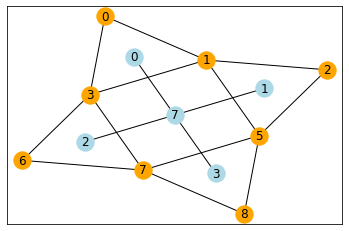

In [30]:
random.seed(0)
GPN = GrowingPlanarNetwork()
GPN.init_square()
# GPN.create_edge(0, 4)
GPN.remove_node(4)
GPN.show_all()

In [37]:
random.seed(0)
GPN = GrowingPlanarNetwork()
GPN.init_square()
# GPN.show_all()
# GPN.duplicate_random_node()
GPN.duplicate_node(4)
# plt.figure()
# GPN.show_all()
for i in range(400):
    print(i, end="")
    GPN.duplicate_random_node()
    GPN.check_dual_ngb_consistency(77)
    
# plt.figure(figsize=(10, 10))
# GPN.show_all()
# GPN.check_dual_ngb_consistency(77)
# GPN.verbose = True
# GPN.duplicate_random_node()

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360361362363364365366367368369

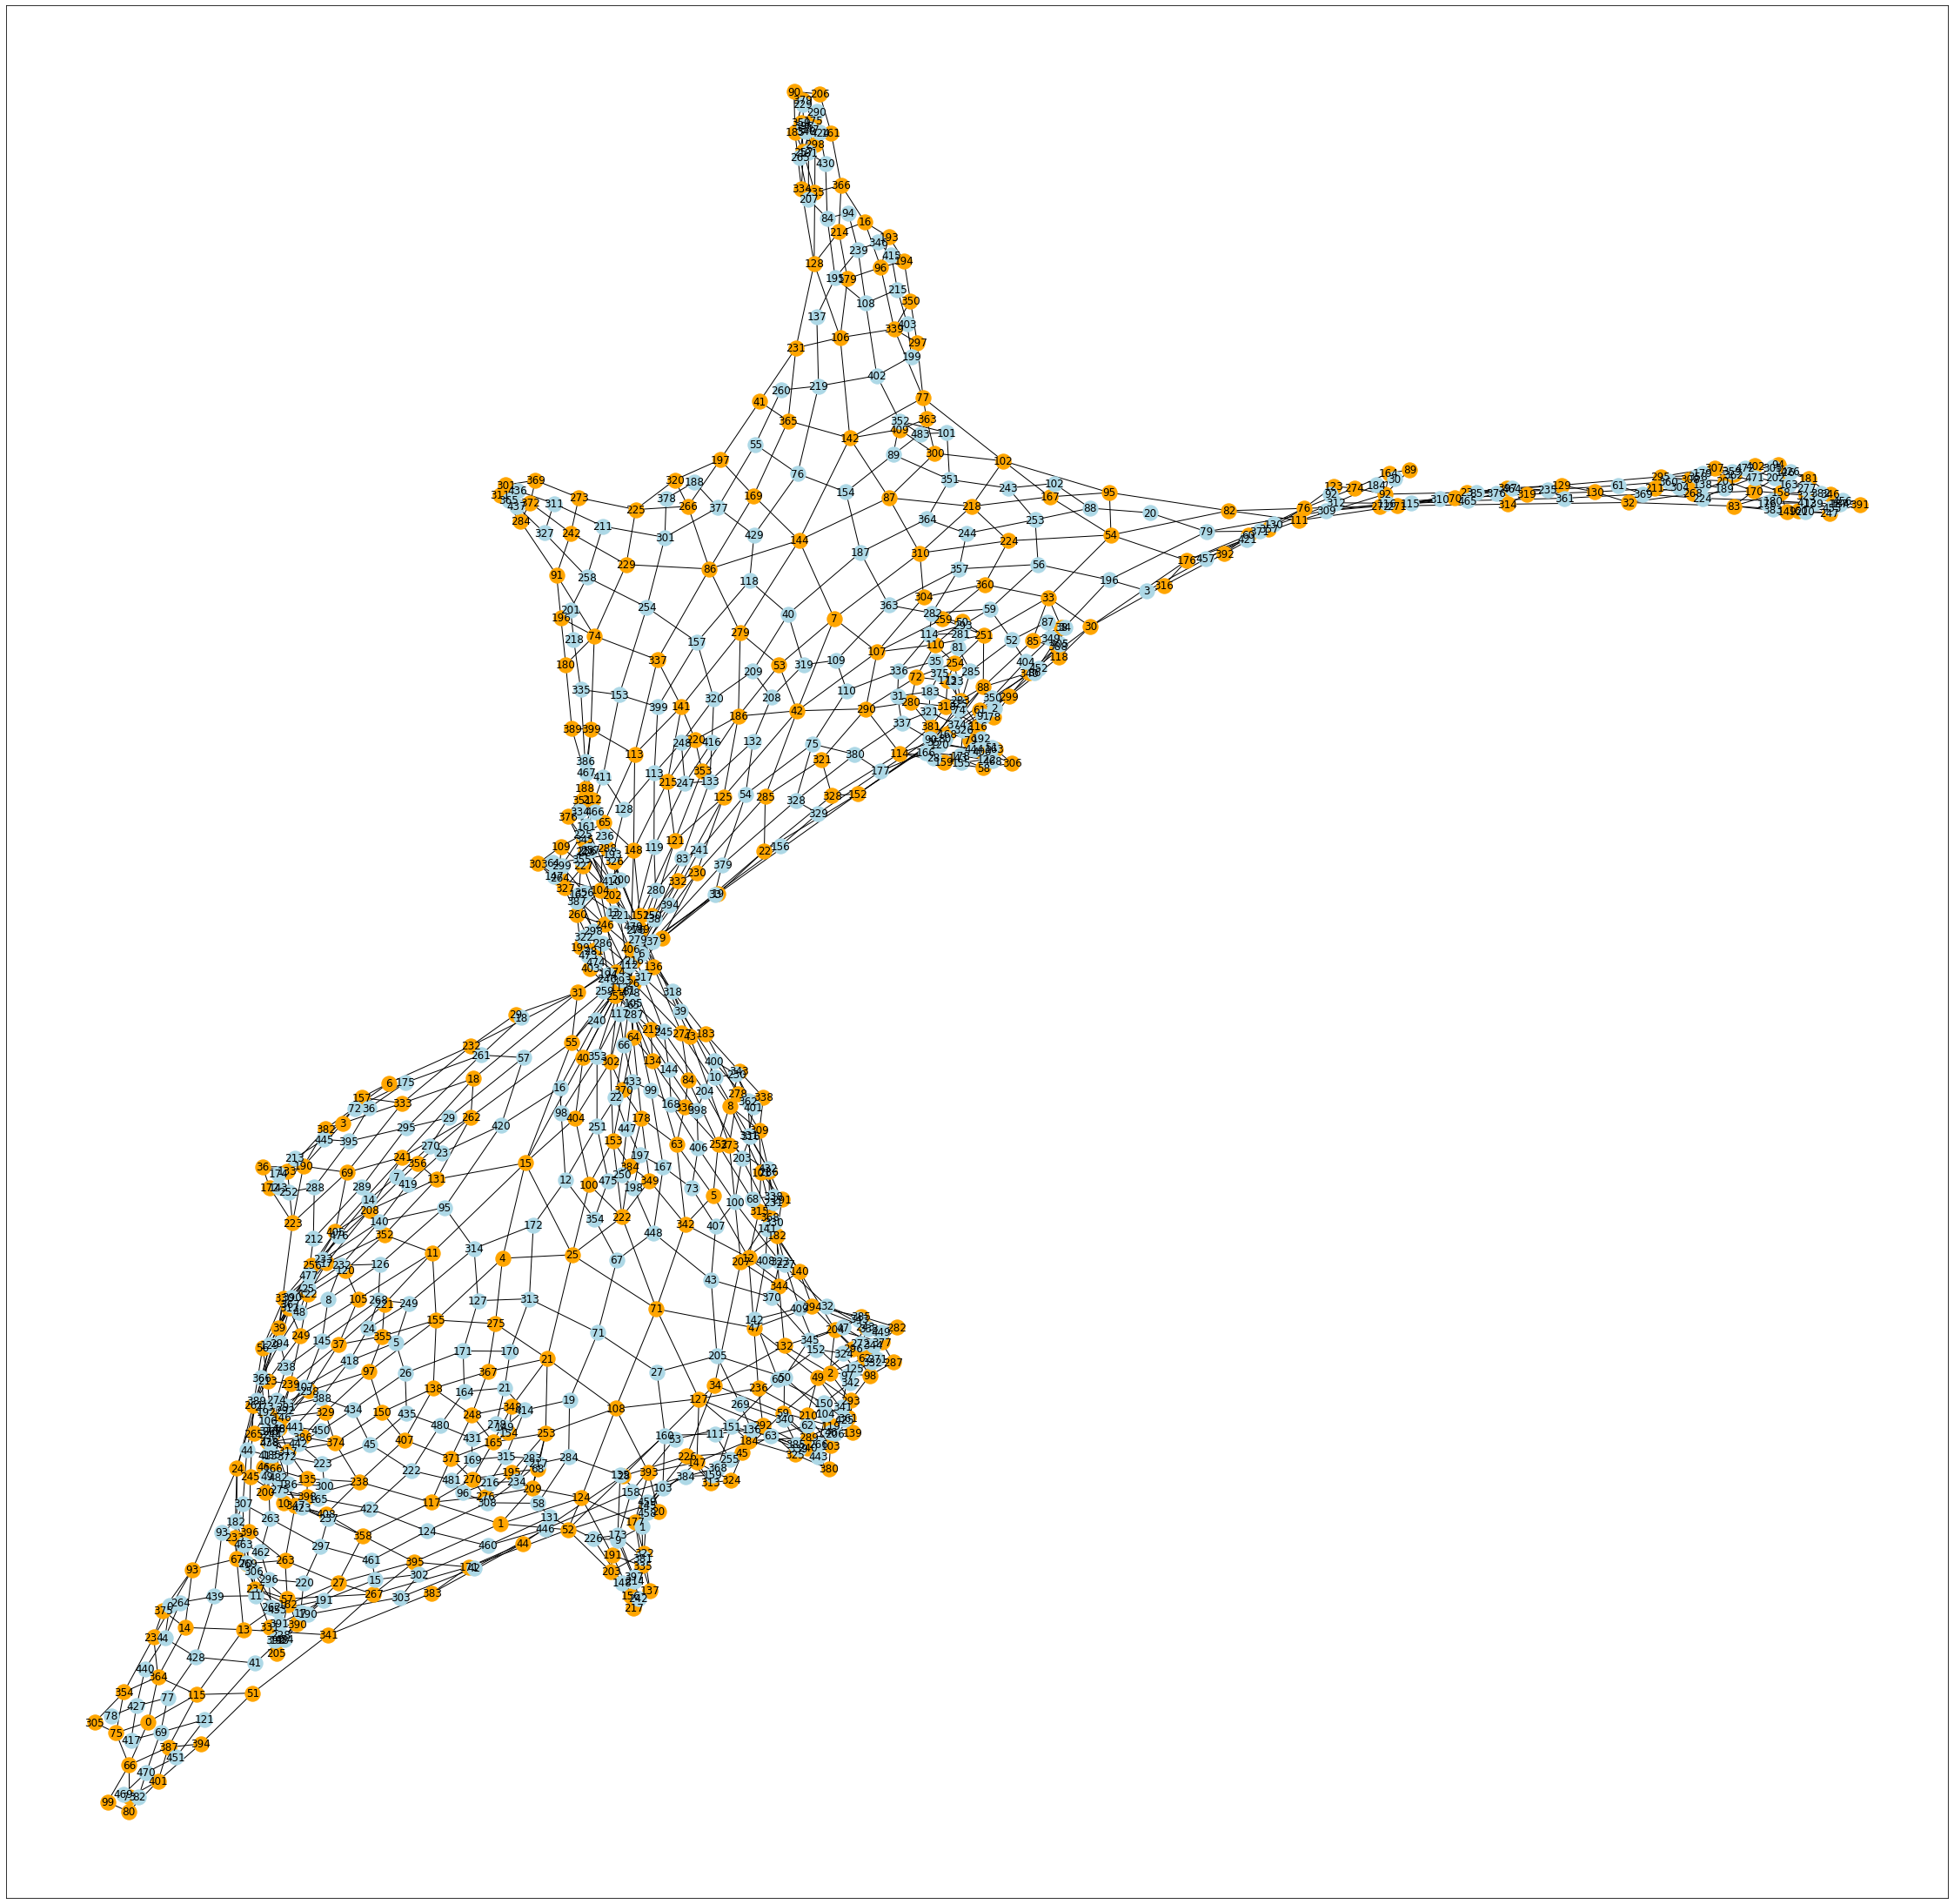

In [38]:
plt.figure(figsize=(40, 40))
GPN.show_all(k=0.2, iterations=500)

In [498]:
list(GPN.G.neighbors(14)), GPN.G.nodes[14], GPN.G.nodes[13]

([13, 24, 75, 0], {'ngb': [13, 0, 75, 24]}, {'ngb': [67, 44, 51, 14]})

Notes

Considering that our developmental model is ok (I think that heterogeneity in division location can lead to something quite unexpected, we'll see.

However, the next step is to build simple equation.

In [252]:
def test_square():
    GPN = GrowingPlanarNetwork()
    GPN.init_square()
    # test edge planar graph
    
    # test edge dual graph
    
    # test cyclic order planar
    
    # test cyclic order dual
    
    # test intermediate